In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
df_data = pd.DataFrame(boston.data,columns=boston.feature_names)
print("説明変数")
print(df_data.shape)
df_data.head()

説明変数
(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
print("目的変数")
display(boston.target[:10])

目的変数


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [5]:
df = pd.concat([df_data,pd.DataFrame(boston.target,columns=["MEDV"])],axis=1)
display(df.corr().round(2))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


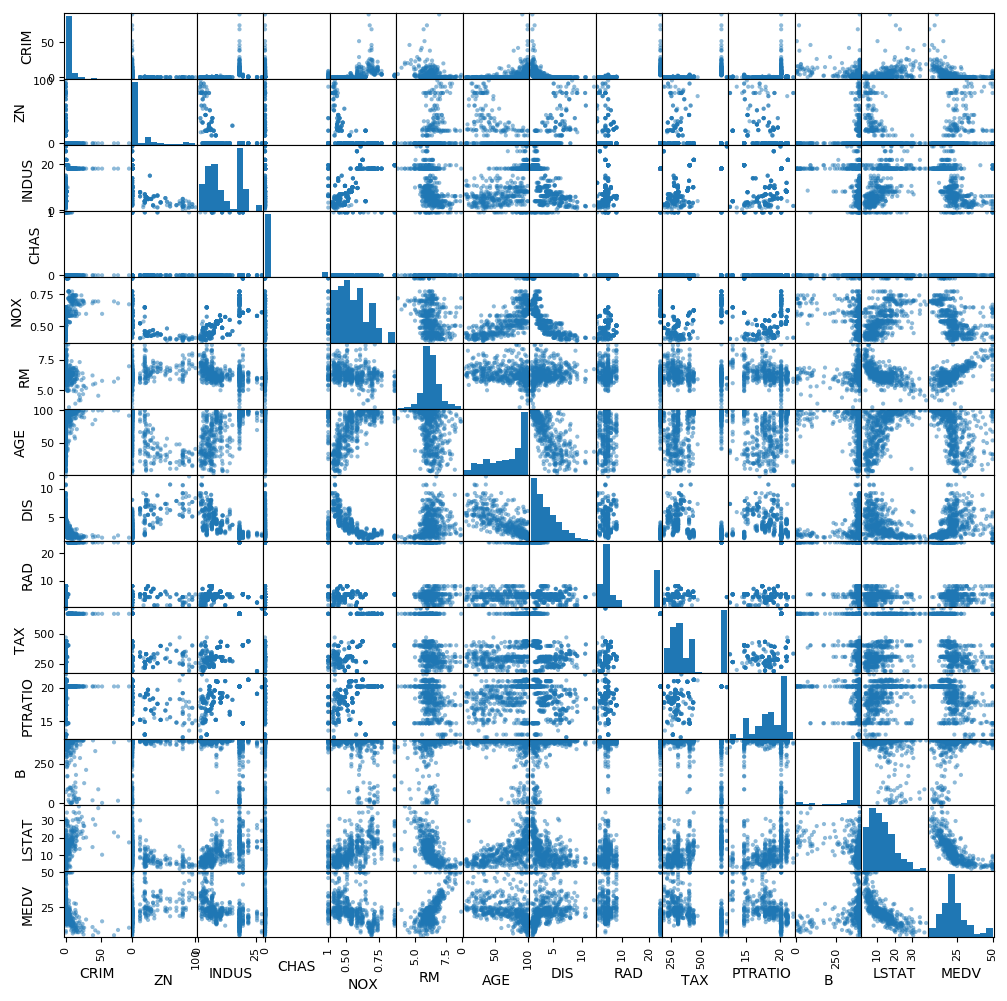

In [7]:
pd.plotting.scatter_matrix(df,figsize=(12,12))
plt.show()

In [8]:
X = df_data[["LSTAT"]].as_matrix()
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=True,test_size=0.3,random_state=1234)

#標準化
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)
std = StandardScaler()
y_train = std.fit_transform(y_train.reshape(-1, 1)).reshape(1, -1)[0]
y_test = std.transform(y_test.reshape(-1, 1)).reshape(1, -1)[0]


c:\Users\ssshu\anaconda3\envs\dl\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [11]:
print(std.fit_transform(y_train.reshape(-1, 1)).reshape(1, -1))

[[ 1.18961424e+00 -4.31799851e-01 -1.66451878e+00  9.11974837e-01
   4.45540648e-01 -9.78796523e-03 -1.36466823e+00 -1.04260653e+00
  -9.42656344e-01  1.34509230e+00 -3.98483123e-01 -1.09813441e+00
  -7.09439249e-01 -2.76321788e-01  1.31761070e-03 -1.65266028e-01
   2.78957009e-01 -4.42905427e-01  7.23180047e-01  2.23429129e-01
  -7.64214209e-02 -5.87277914e-01  3.46343385e-02 -1.36466823e+00
  -1.52014629e+00  1.34584522e-01 -1.54160452e-01 -1.43054876e-01
  -8.75269968e-02 -7.64214209e-02 -1.76371604e-01  1.00081944e+00
   2.78957009e-01 -3.42955243e-01  9.67502717e-01 -4.42905427e-01
  -9.09339616e-01  2.23429129e-01 -1.02039538e+00 -2.43005060e-01
   4.67751800e-01 -8.09389433e-01 -2.54110636e-01  3.12273737e-01
  -3.87377547e-01  9.01622182e-02  8.12024654e-01  6.01018711e-01
  -9.87078648e-01  8.12024654e-01 -1.08702883e+00  1.23478946e-01
   1.45690098e-01  2.78957009e-01 -1.57567417e+00 -3.19991171e-02
  -1.18697901e+00  1.45690098e-01  7.90566423e-02 -7.64967129e-01
  -7.64967